# CONSUMO DOMÉSTICO DE ENERGIA ELÉTRICA (K-MEANS)

## INTRODUÇÃO

O conjunto de dados apresenta informações sobre o consumo de energia elétrica em residências da cidade Sceaux da França. Os registros compreendem um período de quase 4 anos, possuindo 2075259 observações e 9 variáveis. O presente projeto tem como escopo analisar o comportamento dos consumidores. Nesse sentido, utilizando o algoritmo de aprendizado não supervisionado K-means, pretendemos obter uma classificação dos clientes em conjuntos "semelhantes em si". Em outras palavras, iremos realizar uma clusterização dos dados. <br>

**Dataset:** https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

## 1. CARREGANDO PACOTES E IMPORTANDO DADOS

In [1]:
# Carregando pacotes
library(tidyverse)
library(factoextra)
library(cluster)
library(fpc)
library(NbClust)
library(clValid)
library(magrittr)
library(clustertend)
library(gridExtra)
library(lubridate)
library(PerformanceAnalytics)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'cluster' was built under R ve

In [2]:
# Definindo as classes
col<- c("character","character","numeric","numeric","numeric","numeric","numeric","numeric","numeric")

In [3]:
# Carregando dados
df<- read.table("household_power_consumption.txt",sep=";", header=T,colClasses=col,na.strings="?")

In [4]:
# Sumário dos dados
summary(df)

     Date               Time           Global_active_power
 Length:2075259     Length:2075259     Min.   : 0.076     
 Class :character   Class :character   1st Qu.: 0.308     
 Mode  :character   Mode  :character   Median : 0.602     
                                       Mean   : 1.092     
                                       3rd Qu.: 1.528     
                                       Max.   :11.122     
                                       NA's   :25979      
 Global_reactive_power    Voltage      Global_intensity Sub_metering_1  
 Min.   :0.000         Min.   :223.2   Min.   : 0.200   Min.   : 0.000  
 1st Qu.:0.048         1st Qu.:239.0   1st Qu.: 1.400   1st Qu.: 0.000  
 Median :0.100         Median :241.0   Median : 2.600   Median : 0.000  
 Mean   :0.124         Mean   :240.8   Mean   : 4.628   Mean   : 1.122  
 3rd Qu.:0.194         3rd Qu.:242.9   3rd Qu.: 6.400   3rd Qu.: 0.000  
 Max.   :1.390         Max.   :254.2   Max.   :48.400   Max.   :88.000  
 NA's   :25979   

In [5]:
# Visualizando as seis primeiras linhas do dataset
head(df)

Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17
16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0,1,16
16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0,2,17
16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0,1,17
16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17
16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0,2,17


In [6]:
# Visualizando as seis últimas linhas do dataset
tail(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:57:00,0.946,0,240.33,4.0,0,0,0
2075255,26/11/2010,20:58:00,0.946,0,240.43,4.0,0,0,0
2075256,26/11/2010,20:59:00,0.944,0,240.00,4.0,0,0,0
2075257,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0
2075258,26/11/2010,21:01:00,0.934,0,239.70,3.8,0,0,0
2075259,26/11/2010,21:02:00,0.932,0,239.55,3.8,0,0,0


In [7]:
# Visão geral do dataset
glimpse(df)

Rows: 2,075,259
Columns: 9
$ Date                  <chr> "16/12/2006", "16/12/2006", "16/12/2006", "16/12~
$ Time                  <chr> "17:24:00", "17:25:00", "17:26:00", "17:27:00", ~
$ Global_active_power   <dbl> 4.216, 5.360, 5.374, 5.388, 3.666, 3.520, 3.702,~
$ Global_reactive_power <dbl> 0.418, 0.436, 0.498, 0.502, 0.528, 0.522, 0.520,~
$ Voltage               <dbl> 234.84, 233.63, 233.29, 233.74, 235.68, 235.02, ~
$ Global_intensity      <dbl> 18.4, 23.0, 23.0, 23.0, 15.8, 15.0, 15.8, 15.8, ~
$ Sub_metering_1        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ Sub_metering_2        <dbl> 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, ~
$ Sub_metering_3        <dbl> 17, 16, 17, 17, 17, 17, 17, 17, 17, 16, 17, 17, ~


In [8]:
# Checando NAs
sapply(df, function(x) sum(is.na(x)))

Date                  Time   Global_active_power 
                    0                     0                 25979 
Global_reactive_power               Voltage      Global_intensity 
                25979                 25979                 25979 
       Sub_metering_1        Sub_metering_2        Sub_metering_3 
                25979                 25979                 25979

## 2. TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

* O dataset possui valores faltantes, iremos completá-los com o valor da média da variável

In [9]:
# Transformar variável Date em date
df$Date<- dmy(df$Date)

In [10]:
# Imputar a média nos valores faltantes
for(i in 1:ncol(df)) {
    df[ , i][is.na(df[ , i])] <- mean(df[ , i], na.rm = TRUE)}

Warning message in mean.default(df[, i], na.rm = TRUE):
"argument is not numeric or logical: returning NA"

In [11]:
# Checando NAs pós imputação
sapply(df, function(x) sum(is.na(x)))

Date                  Time   Global_active_power 
                    0                     0                     0 
Global_reactive_power               Voltage      Global_intensity 
                    0                     0                     0 
       Sub_metering_1        Sub_metering_2        Sub_metering_3 
                    0                     0                     0

In [12]:
# Visão geral do dataset pós transformação
glimpse(df)

Rows: 2,075,259
Columns: 9
$ Date                  <date> 2006-12-16, 2006-12-16, 2006-12-16, 2006-12-16,~
$ Time                  <chr> "17:24:00", "17:25:00", "17:26:00", "17:27:00", ~
$ Global_active_power   <dbl> 4.216, 5.360, 5.374, 5.388, 3.666, 3.520, 3.702,~
$ Global_reactive_power <dbl> 0.418, 0.436, 0.498, 0.502, 0.528, 0.522, 0.520,~
$ Voltage               <dbl> 234.84, 233.63, 233.29, 233.74, 235.68, 235.02, ~
$ Global_intensity      <dbl> 18.4, 23.0, 23.0, 23.0, 15.8, 15.0, 15.8, 15.8, ~
$ Sub_metering_1        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ Sub_metering_2        <dbl> 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, ~
$ Sub_metering_3        <dbl> 17, 16, 17, 17, 17, 17, 17, 17, 17, 16, 17, 17, ~


### Gráficos

* Iremos visualizar a distruibuição de frequência das variáveis

In [13]:
# Plotando a variável Global_active_power
plot1<-df %>%
ggplot(aes(Global_active_power)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Potência ativa Global",x="kW",y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [14]:
# Plotando a variável Global_reactive_power
plot2<-df %>%
ggplot(aes(Global_reactive_power)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Potência Reativa Global",x="kW",y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [15]:
# Plotando a variável Voltage
plot3<-df %>%
ggplot(aes(Voltage )) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Tensão Média por Minuto",x="Volts",y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

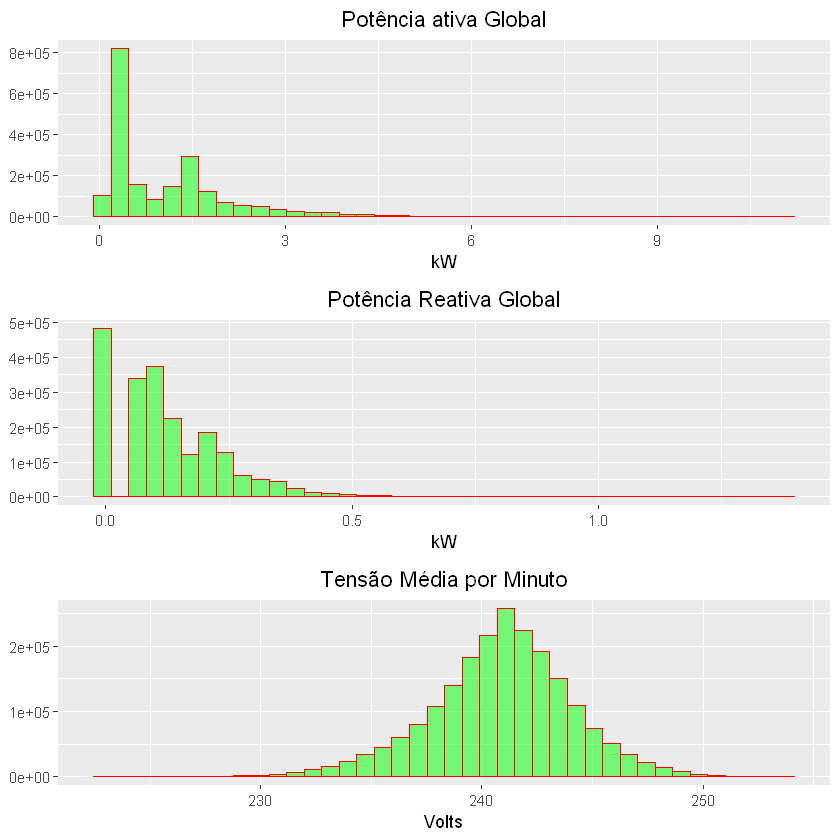

In [16]:
grid.arrange(plot1,plot2,plot3)

In [17]:
# Plotando a variável Global_intensity
plot4<-df %>%
ggplot(aes(Global_intensity)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Intensidade da Corrente",x="Amperes",y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [18]:
# Plotando a variável Sub_metering_1
plot5<-df %>%
ggplot(aes(Sub_metering_1)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Sub-medição de Energia No. 1",x="kWh",y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

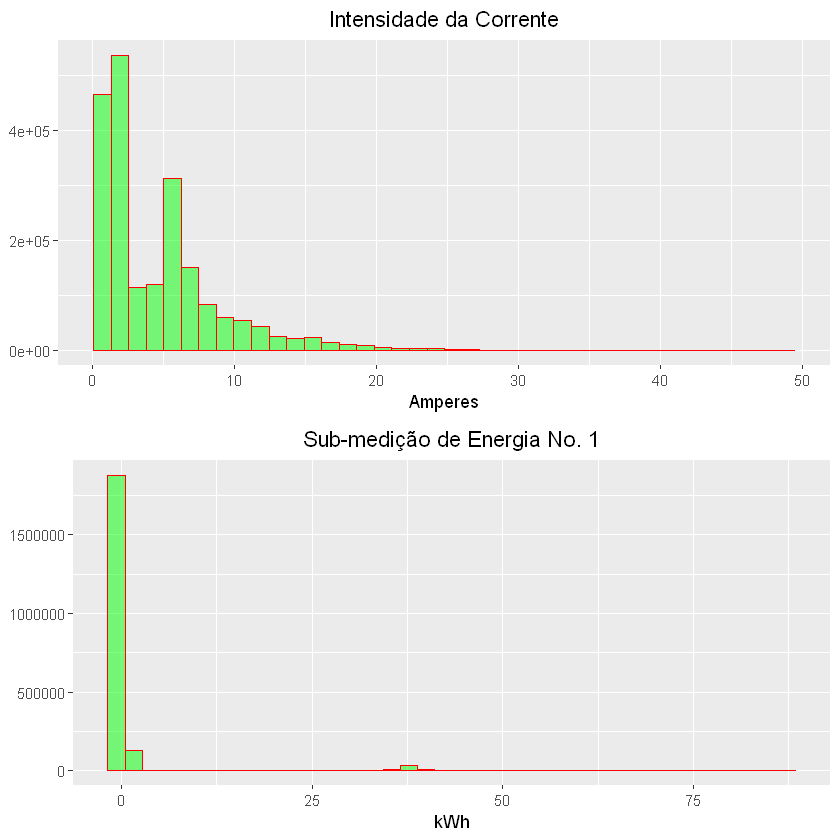

In [19]:
grid.arrange(plot4,plot5)

In [20]:
# Plotando a variável Sub_metering_2
plot6<-df %>%
ggplot(aes(Sub_metering_2)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Sub-medição de Energia No. 2",x="kWh",y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [21]:
# Plotando a variável Sub_metering_3
plot7<-df %>%
ggplot(aes(Sub_metering_3)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Sub-medição de Energia No. 3",x="kWh",y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

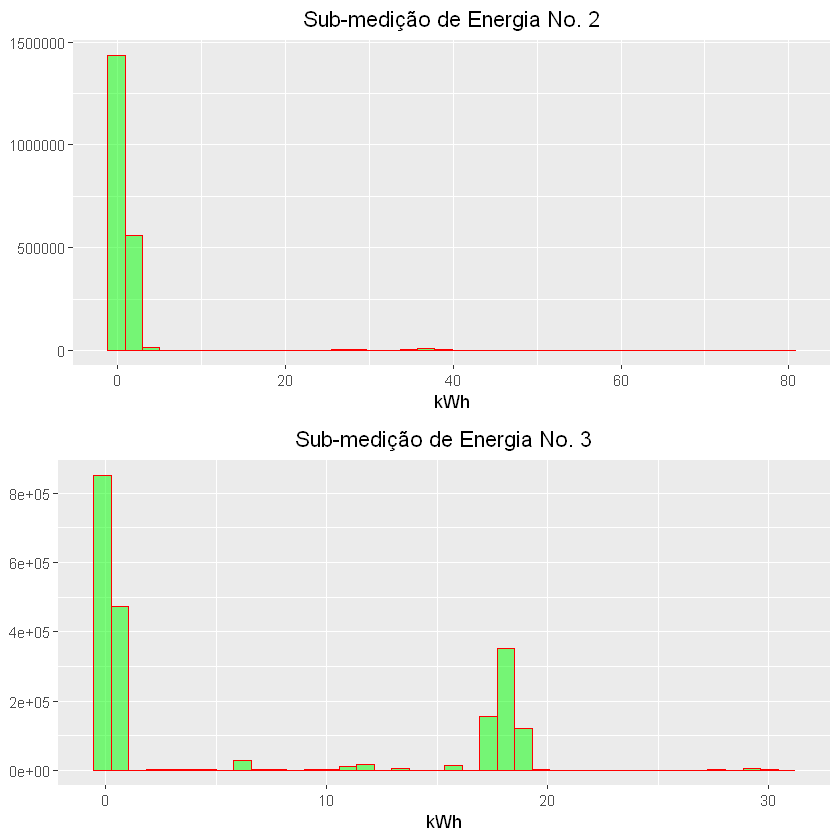

In [22]:
grid.arrange(plot6,plot7)

## 3. CONSTRUINDO MODELO

* Um vez que o conjunto de dados possui mais de 2 milhões de observações e como consequência demandaria um poder de processamento demasiado, iremos retirar uma amostra.
* Iremos remover as duas primeiras colunas pois representam apenas data e tempo, não sendo importantes para nosso trabalho.
* Iremos realizar estatística hopkins para testar se o conjunto de dados é próprio para se realizar clusterização.

In [23]:
# Obtendo uma amostra
df2<- df %>%
slice_sample(n=2000)

In [24]:
# Removendo as duas primeiras colunas
df2<- df2[,-c(1,2)]

In [25]:
# Visão geral dos dados
glimpse(df2)

Rows: 2,000
Columns: 7
$ Global_active_power   <dbl> 0.318000, 1.368000, 0.232000, 0.206000, 0.250000~
$ Global_reactive_power <dbl> 0.0760000, 0.0720000, 0.0860000, 0.1220000, 0.05~
$ Voltage               <dbl> 239.4200, 239.3300, 243.2900, 239.1000, 245.2000~
$ Global_intensity      <dbl> 1.400000, 5.600000, 1.200000, 1.000000, 1.000000~
$ Sub_metering_1        <dbl> 0.000000, 0.000000, 0.000000, 0.000000, 0.000000~
$ Sub_metering_2        <dbl> 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.0~
$ Sub_metering_3        <dbl> 0.000000, 18.000000, 0.000000, 0.000000, 0.00000~


In [26]:
# Normalizando os dados
df2_scaled<- scale(df2)

In [27]:
# Visualizando as seis primeiras linhas do dataset
head(df2_scaled)

Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
-0.7382902,-0.4411957,-0.4745020,-0.7343632,-0.1826551,-0.2333239,-0.7684471
0.2631701,-0.4778449,-0.5025966,0.2189827,-0.1826551,-0.2333239,1.4050856
-0.8203146,-0.3495725,0.7335664,-0.7797607,-0.1826551,-0.2333239,-0.7684471
-0.8451127,-0.0197291,-0.5743940,-0.8251581,-0.1826551,-0.2333239,-0.7684471
-0.8031467,-0.6427666,1.3297966,-0.8251581,-0.1826551,-0.2333239,-0.7684471
1.0013894,-0.2762740,-0.9833267,0.9907390,-0.1826551,-0.2333239,1.4050856


In [29]:
# Aplicando a estatística hopkins
hopkins(df2_scaled, n=nrow(df2_scaled)-1)

$H
[1] 0.04370174

### 3.1 Obter número de clusters

* Uma vez que a estatística hopkins obterve um valor menor que 5, nosso dataset está apto para clusterização.
* Há vários opções para se determinar o número ideal de Clusters, e eles podem diferir entre si. Usaremos quatro opções.
* Função NbCluster() com index "silhouette" e "all"
* Função fviz_nbclust() com métodos "wss" e "silhouette" 

In [30]:
# Determinando o número de clusters opção 1
NbClust(df2_scaled, distance = "euclidean",
                    min.nc = 2, 
                    max.nc = 15, 
                    method = "kmeans",
                    index = "silhouette")

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"

$All.index
     2      3      4      5      6      7      8      9     10     11     12 
0.4023 0.4145 0.3266 0.2831 0.2836 0.2948 0.2612 0.3128 0.2923 0.2977 0.2868 
    13     14     15 
0.2903 0.2770 0.2794 

$Best.nc
Number_clusters     Value_Index 
         3.0000          0.4145 

$Best.partition
   [1] 2 3 2 2 2 3 2 2 3 2 3 2 2 1 2 3 2 2 2 2 3 3 2 1 2 3 2 3 1 2 2 1 3 3 2 2 2
  [38] 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 3 3 2 2 3 2 3 2 2 2 2 2 3 3 2 2
  [75] 2 2 2 2 3 2 2 2 1 3 2 2 2 2 2 2 3 2 3 2 2 2 3 2 2 3 2 2 2 2 3 2 2 2 2 3 3
 [112] 1 3 2 3 1 2 2 2 2 3 2 2 3 2 2 3 2 2 2 3 3 2 2 1 3 2 3 2 3 3 2 3 3 2 2 2 1
 [149] 2 2 3 3 3 3 2 3 3 2 2 3 3 2 2 1 2 2 3 2 3 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 3
 [186] 3 2 2 2 3 3 3 2 2 2 2 2 2 3 2 2 3 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 1 2 3 3 2 2 2 3 2 2 2 2 2 3 3 3 3 2 2 2 2 3 3 2 3 3 2 3 2 3
 [260] 2 2 2 2 2 2 3 2 2 2 1 3 2 2 2 3 2 2 2 2 2 2 3 2 2 3 3 3 2 3 2 2 2 2 3 2 2
 [297] 2 2 2 3 2 3 3 3 3 3 3 2 2 2 2 1 2 3 2 2 3 2 1 1 2 3 3 2 2 3 3 2 2 3 3 2 2
 [334] 3 3 1 2 2 2 2 2 2 2 2 3 3 2 3 3 2 2 2 2 2 3 3 2 3 2 2 3 3 3 3 2 2 3 3 2 2
 [371] 2 2 1 2 2 3 1 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 3 3 2 2 3 2 2 2 2 2 2 3 2 1
 [408] 2 2 2 3 2 3 2 3 2 2 3 3 2 3 3 3 3 2 3 3 3 2 3 2 2 3 3 2 2 2 1 2 2 3 2 2 2
 [445] 3 3 3 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 3 3 2
 [482] 1 3 2 2 2 3 3 2 2 2 2 1 2 2 3 2 2 2 1 3 2 2 2 3 2 1 3 3 3 2 2 3 1 3 2 3 2
 [519] 1 2 2 2 2 3 3 2 2 3 3 2 3 3 2 3 2 3 3 3 2 2 2 2 2 3 2 3 2 2 2 3 1 2 2 3 3
 [556] 1 2 2 2 3 2 2 2 2 2 1 2 3 2 3 2 3 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2
 [593] 2 2 2 3 1 2 2 2 3 2 2 2 3 2 2 3 2 3 3 2 3 2 3 3 3 2 2 2 2 2 3 2 2 2 2 3 3
 [630] 1 3 2 1 2 1 2 2 2 2 2 2 3 2 3 2 2 3 2 3 2 2 3 2 2 3 2 2 1 2 3 2 3 2 2 3 2
 [667] 1 2 2 2 2 2 1 2 3 2 2 3 3 2 2 3 2 2 2 3 2 2 3 3 3 3 2 3 2 3 3 3 2 3 3 3 2
 [704] 2 2 3 3 1 2 2 3 2 2 3 3 2 2 2 3 3 2 3 2 3 2 2 3 2 2 2 3 2 3 2 3 3 3 3 2 2
 [741] 2 2 1 2 3 2 2 2 2 3 2 3 2 2 2 2 3 1 3 2 2 3 3 3 2 2 2 3 2 2 2 2 3 2 3 2 2
 [778] 2 3 3 2 2 3 2 2 2 2 3 3 3 1 3 2 3 3 3 2 2 3 2 2 2 3 3 2 2 2 3 3 1 3 2 2 2
 [815] 3 2 2 1 2 2 2 2 2 2 2 1 2 3 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [852] 3 3 2 3 2 3 3 2 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 2 2 2 2 3 2 2 2 2
 [889] 2 2 3 2 3 3 2 2 2 2 2 2 3 3 2 2 3 2 2 2 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2
 [926] 2 2 3 3 2 2 2 2 1 2 3 2 2 2 3 2 2 3 1 2 3 3 2 3 3 2 2 2 2 2 2 2 1 2 2 3 2
 [963] 2 2 2 2 2 2 3 2 2 2 3 3 3 2 2 3 2 1 2 2 2 2 2 2 3 2 2 2 2 2 3 2 3 3 2 2 3
[1000] 2 2 2 3 2 1 2 3 3 3 3 2 2 3 2 1 3 3 1 2 2 2 3 2 2 1 2 2 3 2 3 2 2 2 3 3 3
[1037] 2 3 2 2 3 3 3 2 2 3 3 3 3 2 3 2 3 2 2 1 3 3 1 2 3 2 3 2 2 2 2 3 3 2 2 2 2
[1074] 3 2 2 2 1 2 2 2 2 3 2 2 2 3 2 2 2 3 3 2 1 2 2 2 2 3 3 3 3 2 3 2 2 2 3 2 3
[1111] 3 2 3 1 3 2 3 3 2 2 2 2 2 2 1 2 3 2 3 2 2 1 3 2 2 2 2 2 2 3 2 2 1 2 3 3 2
[1148] 2 3 2 2 2 2 2 3 3 2 2 3 2 2 3 3 2 3 2 3 2 3 2 2 2 2 3 2 2 2 1 2 2 3 2 2 3
[1185] 2 2 3 2 2 2 3 2 2 3 2 2 3 2 2 2 2 3 2 3 3 3 2 3 2 3 2 2 2 2 3 3 2 3 2 3 3
[1222] 2 3 2 2 3 1 3 2 2 1 2 3 2 1 2 1 1 2 3 2 2 3 2 3 2 3 1 2 3 3 1 2 2 3 2 2 2
[1259] 2 2 2 2 2 2 3 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 2 2 2 2 1 2 2 2 2 2 3 2 3 2 3
[1296] 3 2 3 2 2 1 2 2 3 2 2 3 2 2 2 2 2 3 2 2 3 2 2 3 2 3 2 2 2 2 2 2 3 2 2 2 3
[1333] 3 3 2 3 2 2 2 2 2 1 2 2 3 2 2 2 3 3 2 2 2 3 2 2 2 2 2 2 1 2 2 2 3 3 3 2 2
[1370] 3 3 2 2 3 2 3 2 2 3 3 2 2 2 2 3 2 3 2 2 2 2 2 2 1 2 3 2 3 2 2 3 1 3 3 2 2
[1407] 3 2 2 1 2 3 2 2 2 1 2 3 2 2 3 2 2 3 3 2 3 2 3 2 2 2 2 2 3 2 2 2 2 2 3 2 3
[1444] 3 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 3 3 2 3 2 2 2 2 2 2 2 2 2 3 2 2 3 2 3 3
[1481] 2 1 2 3 3 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 3 2 3 2 2 3 2 2 3 2 2 2 2 2 2 3 3
[1518] 3 1 3 2 2 3 3 2 2 2 3 2 3 3 3 2 2 2 3 3 2 2 2 3 3 3 3 2 2 2 2 2 2 2 3 3 3
[1555] 1 2 3 3 3 2 2 3 2 3 2 2 3 2 3 2 2 3 1 3 3 2 2 2 2 2 1 2 3 2 2 3 3 2 3 2 2
[1592] 2 2 3 3 2 1 2 2 2 3 3 2 2 1 2 3 3 2 2 2 2 2 3 3 2 3 3 1 2 2 2 3 3 2 3 3 2
[1629] 2 2 2 3 2 2 1 3 3 2 2 2 3 2 2 3 2 2 3 2 2 2 3 3 2 2 3 2 3 2 2 2 2 2 2 3 2
[1666] 3 2 2 2 3 2 2 2 2 3 2 2 2 3 1 3 2 2 3 2 1 2 

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


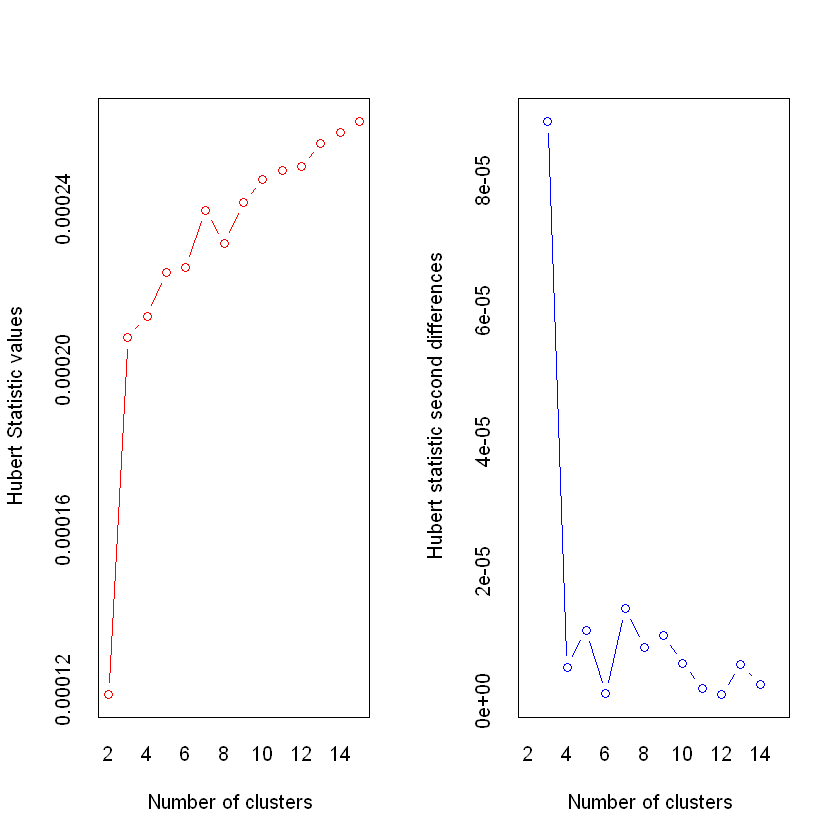

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 10 proposed 3 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 4 proposed 9 as the best number of clusters 
* 1 proposed 12 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* A

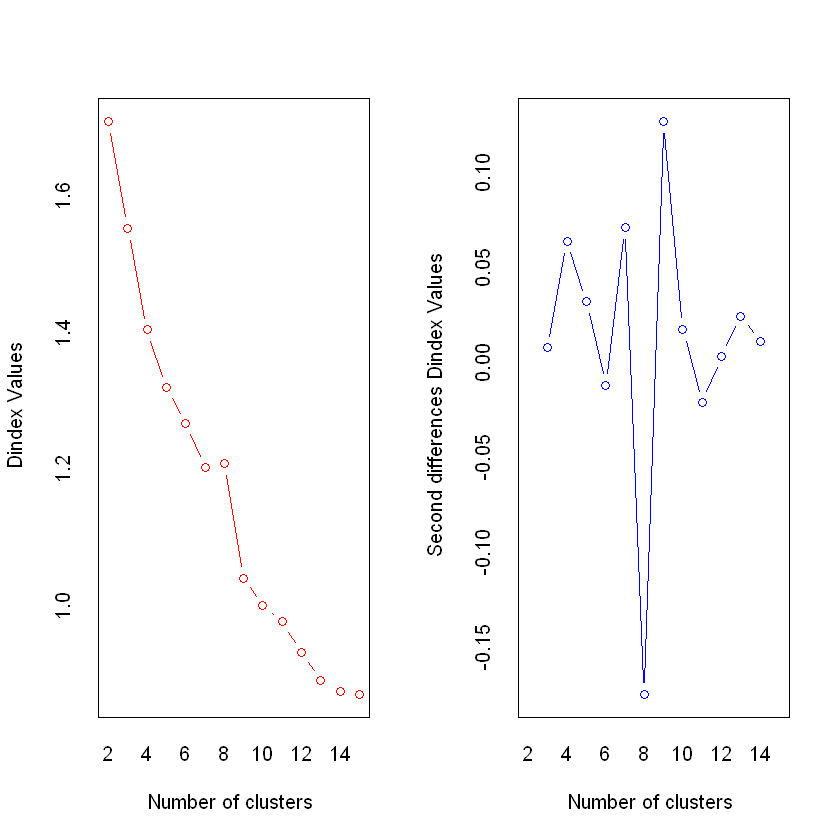

In [31]:
# Determinando o número de clusters opção 2
num_clusters_opt2 <- NbClust(df2_scaled,  
                             distance = "euclidean", 
                             min.nc = 2, 
                             max.nc = 15, 
                             method = "kmeans",
                             index = "all")

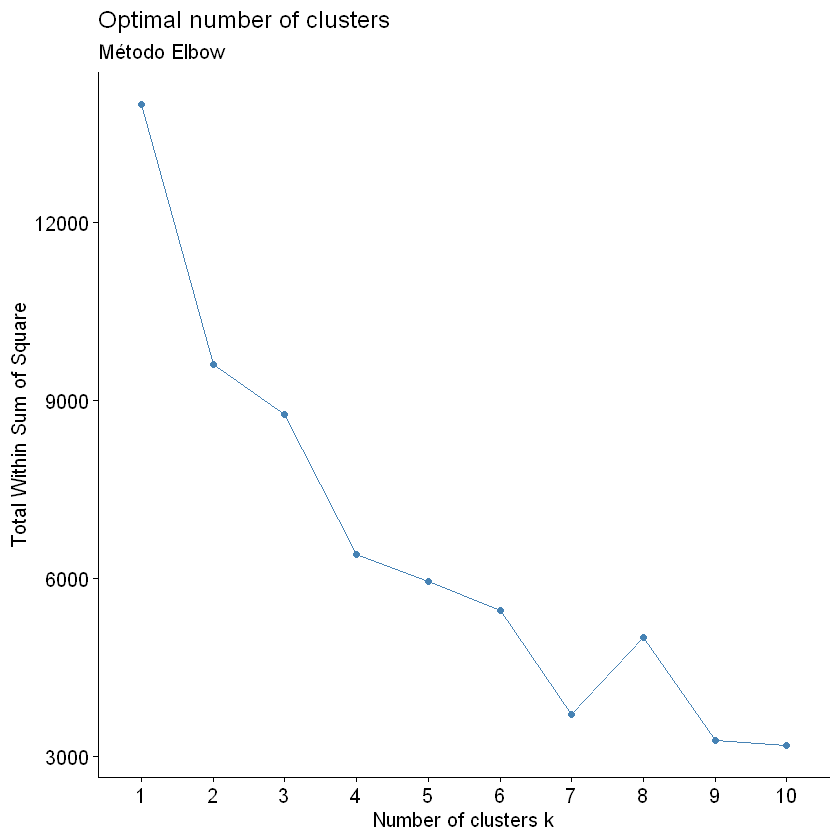

In [32]:
# # Determinando o número de clusters opção 3
fviz_nbclust(df2_scaled, kmeans,method="wss") +
labs(subtitle = "Método Elbow")

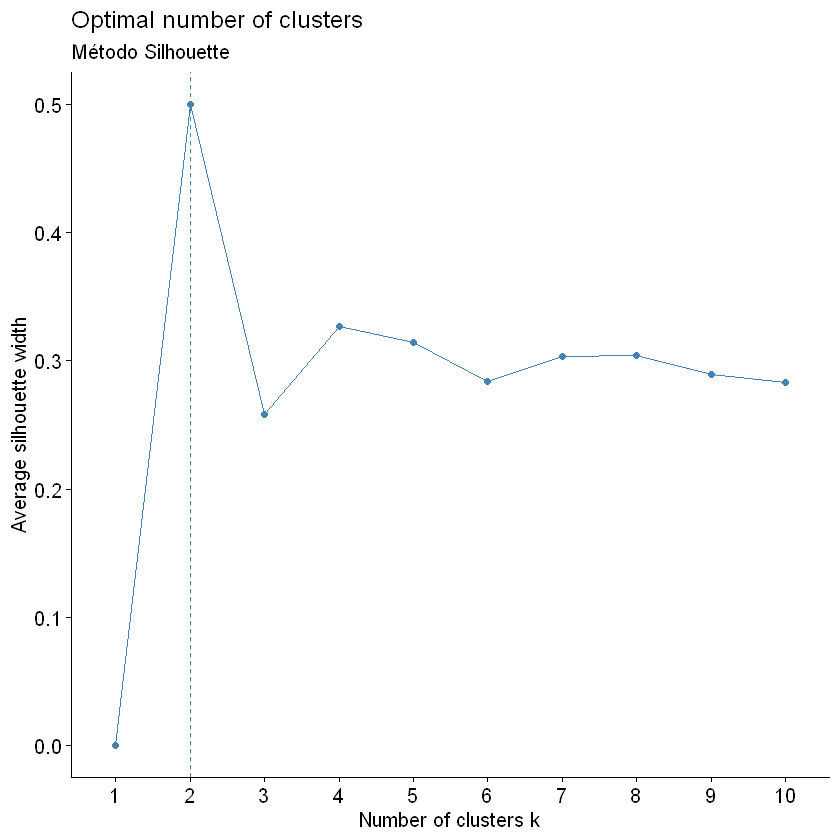

In [33]:
# Determinando o número de clusters opção 4
fviz_nbclust(df2_scaled, kmeans,method="silhouette") +
labs(subtitle = "Método Silhouette")

### Modelo 1 

* Modelo com k=2

In [34]:
# Construindo modelo 1
model_v1<- kmeans(df2_scaled,centers = 2, nstart = 25)

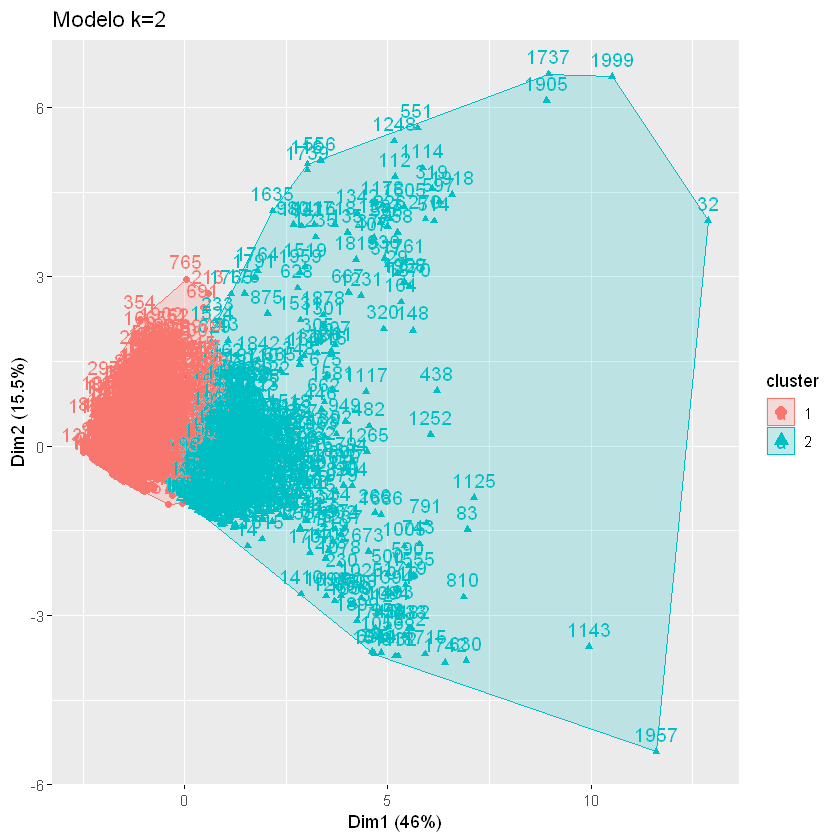

In [35]:
# Plotando modelo 1
fviz_cluster(model_v1,df2_scaled, main="Modelo k=2")

  cluster size ave.sil.width
1       1 1247          0.57
2       2  753          0.13


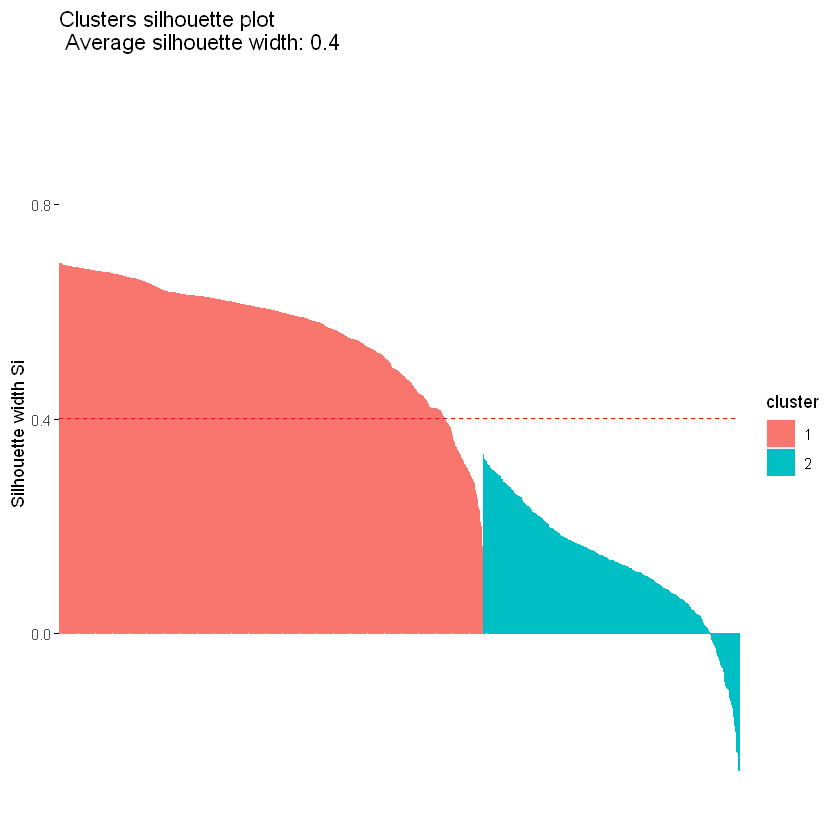

In [36]:
# Plotando average silhouette width 1
sil1 <- silhouette(model_v1$cluster, dist(df2_scaled))
fviz_silhouette(sil1)

### Modelo 2

* Modelo com K=3

In [37]:
# Construindo modelo 2
model_v2<- kmeans(df2_scaled,centers = 3, nstart = 25)

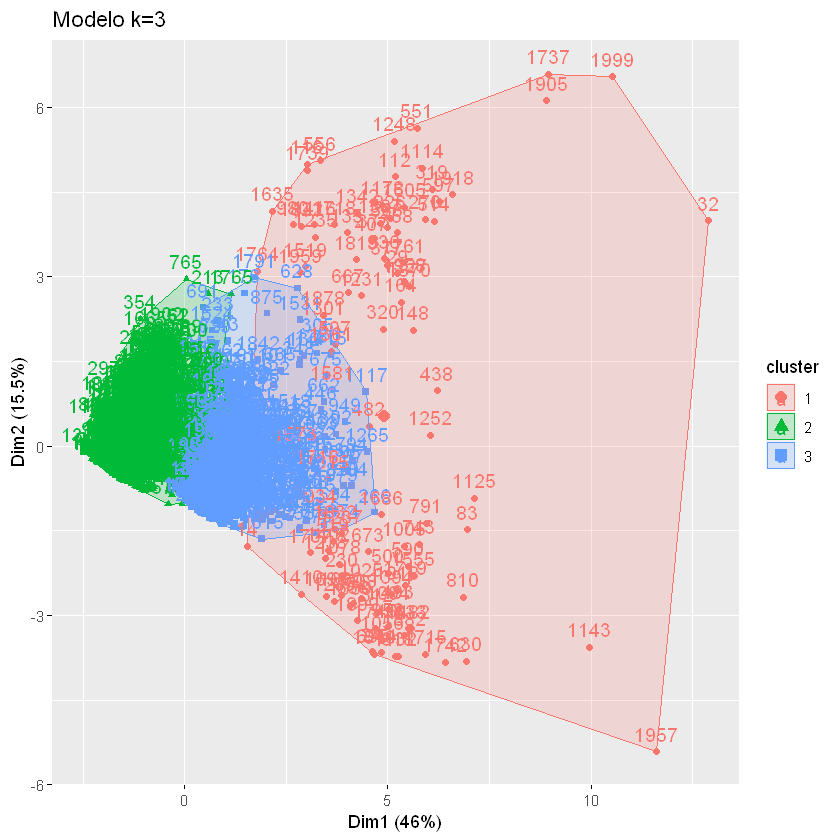

In [38]:
# Plotando modelo 2
fviz_cluster(model_v2,df2_scaled, main="Modelo k=3")

  cluster size ave.sil.width
1       1  112          0.08
2       2 1233          0.49
3       3  655          0.33


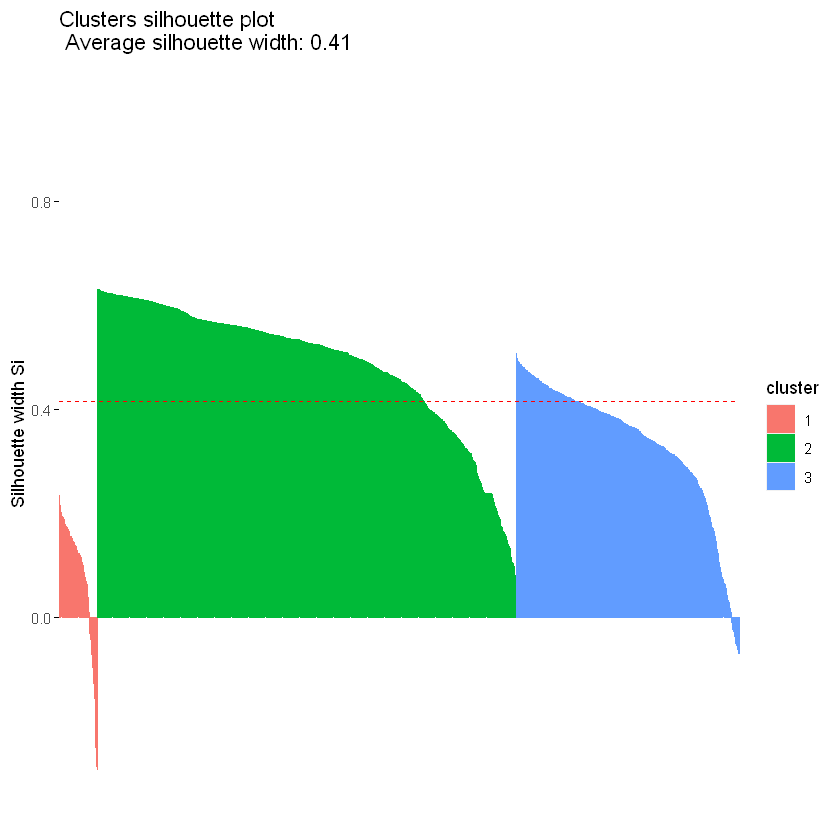

In [39]:
sil2 <- silhouette(model_v2$cluster, dist(df2_scaled))
fviz_silhouette(sil2)

### Modelo 3

* Modelo com k=4

In [40]:
# Construindo modelo 3
model_v3<- kmeans(df2_scaled,centers = 4, nstart = 25)

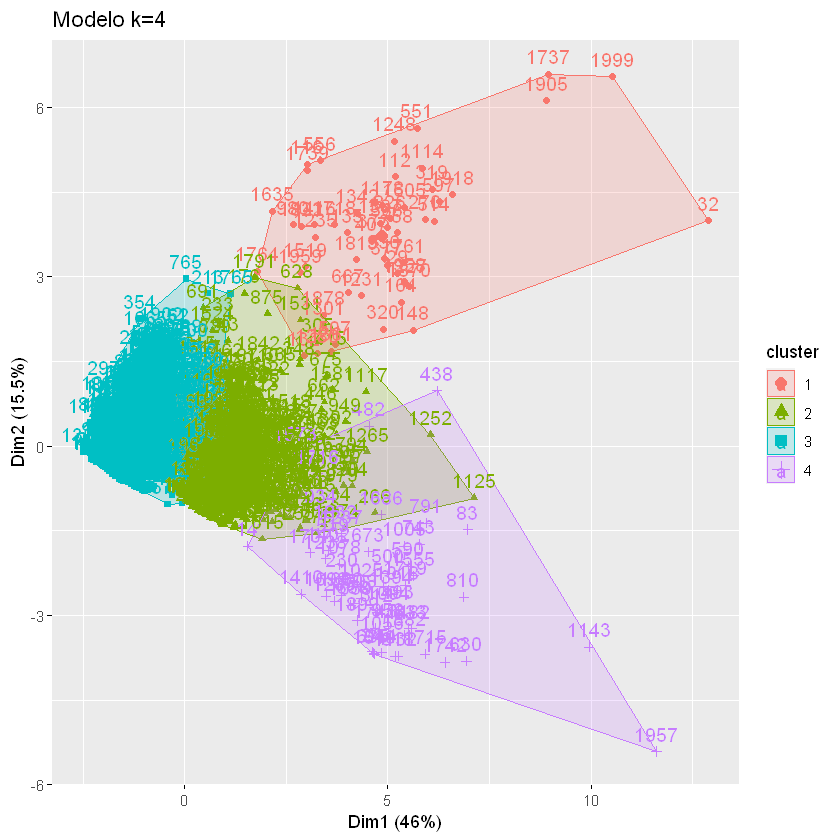

In [41]:
# Plotando modelo 3
fviz_cluster(model_v3,df2_scaled, main="Modelo k=4")

  cluster size ave.sil.width
1       1   54          0.40
2       2  657          0.33
3       3 1233          0.49
4       4   56          0.51


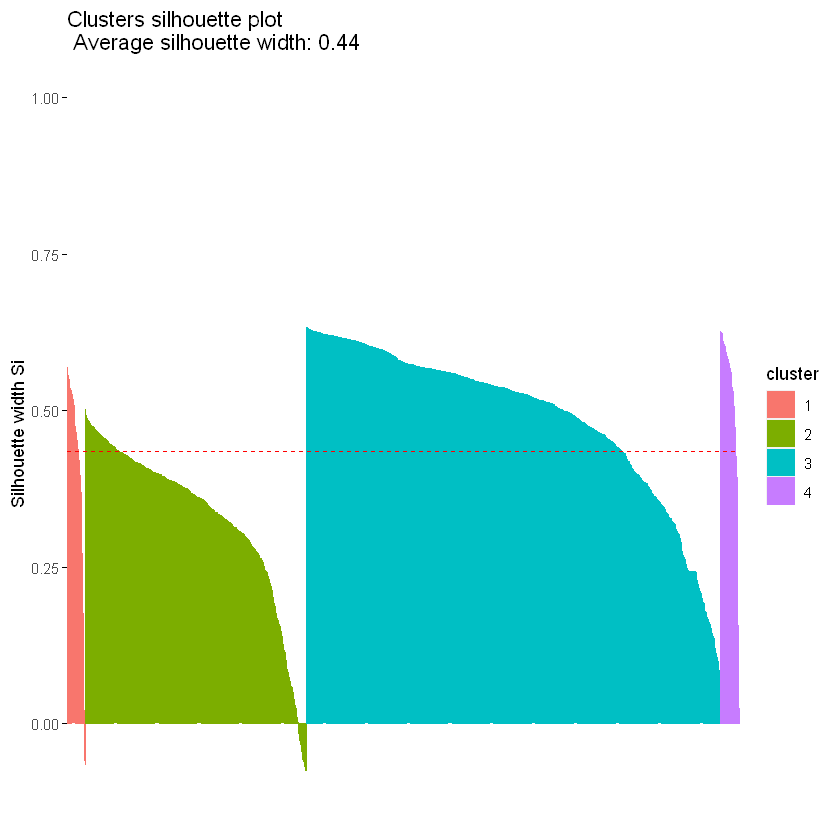

In [42]:
sil3 <- silhouette(model_v3$cluster, dist(df2_scaled))
fviz_silhouette(sil3)

### Modelo 4

* Modelo com k=5

In [43]:
# Construindo modelo 4
model_v4<- kmeans(df2_scaled,centers = 5, nstart = 25)

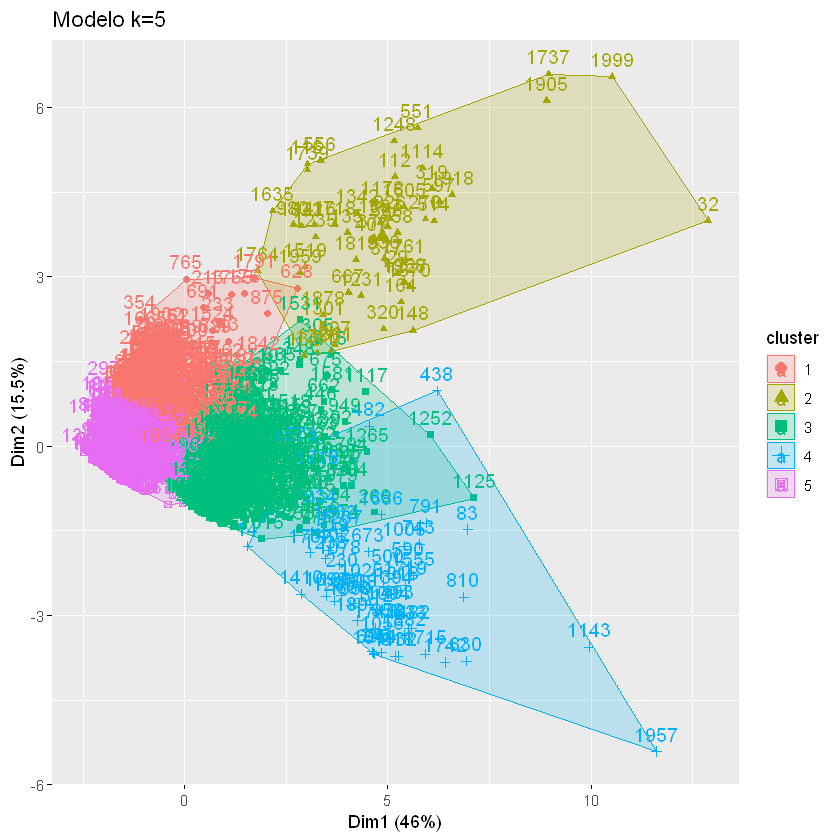

In [44]:
# Plotando modelo 3
fviz_cluster(model_v4,df2_scaled, main="Modelo k=5")

  cluster size ave.sil.width
1       1  428          0.24
2       2   54          0.39
3       3  615          0.33
4       4   56          0.51
5       5  847          0.39


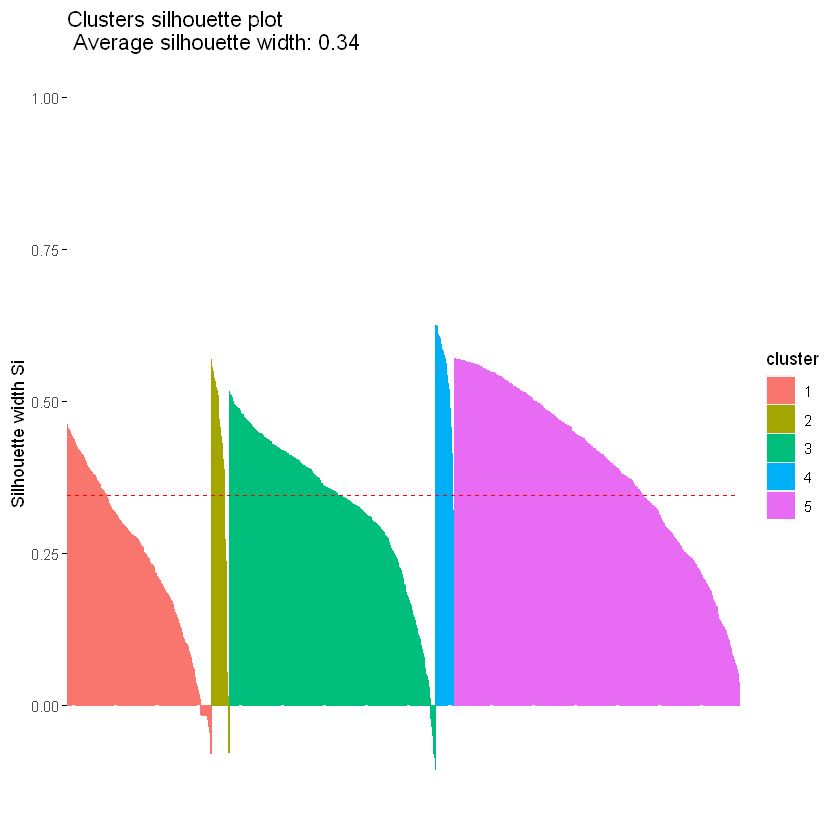

In [45]:
sil4 <- silhouette(model_v4$cluster, dist(df2_scaled))
fviz_silhouette(sil4)

**Conclusões**
* Como ponto de partida, usamos alguns métodos para obter o melhor valor de k. Obtivemos k=2 e k=3 como melhores valores.
* Construímos 4 modelos com valores de k de 2 à 5.
* Obtivemos melhor average silhouette width para o modelo 3 com k=4, ele obteve o score de 0.44.

### 3.2 Integrando Cluster ao Dataset

* Iremos integrar a coluna cluster ao dataset para obtermos a classificação do cliente.
* Apresentaremos a estatística básica das informações do consumo por cluster.

In [46]:
# Integrando coluna cluster ao dataset
df2$Cluster<- model_v3$cluster

In [47]:
# Visualizando as seis primeiras linhas do dataset com clusters
head(df2)

Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Cluster
0.318,0.076,239.42,1.4,0,0,0,3
1.368,0.072,239.33,5.6,0,0,18,2
0.232,0.086,243.29,1.2,0,0,0,3
0.206,0.122,239.10,1.0,0,0,0,3
0.250,0.054,245.20,1.0,0,0,0,3
2.142,0.094,237.79,9.0,0,0,18,2


In [48]:
# Estatística básica do consumo por cluster
df2 %>%
group_by(Cluster) %>%
summarize(Média=mean(Global_active_power),Mediana=median(Global_active_power),
          Desvio_Padrão=sd(Global_active_power),Variância=var(Global_active_power))

Cluster,Média,Mediana,Desvio_Padrão,Variância
1,3.6961111,3.646,1.1661528,1.3599124
2,1.8350107,1.576,0.6978015,0.4869270
3,0.4622731,0.342,0.3452631,0.1192066
4,3.7316786,3.661,0.9634660,0.9282667


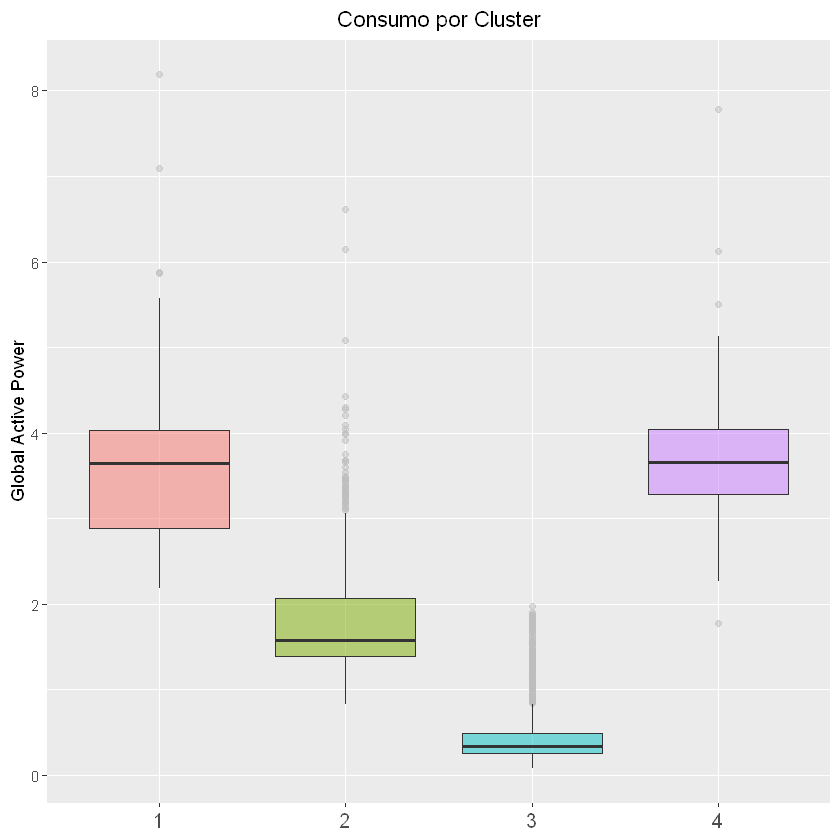

In [49]:
# Plotando consumo por cluster
df2 %>%
ggplot(aes(factor(Cluster),Global_active_power,fill=factor(Cluster))) +
geom_boxplot(show.legend=F, alpha=.5,outlier.color="gray") +
labs(title="Consumo por Cluster",x=NULL,y="Global Active Power") +
theme(plot.title = element_text(hjust = 0.5),
     axis.text.x = element_text(size = 12))